In [1]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N = 864
m =10
L = 34.1580
nsteps = 10000
V = L**3
rho = N/L
sigma = 3.4
radii = np.linspace(0,20,100, endpoint=True)

In [3]:
file_dists = 'distances.dat'
distances =  np.genfromtxt(file_dists, delimiter=" ", usecols=range(0,1), unpack=False)
distances = distances[distances != 0]
histogram_distances = np.histogram(distances,radii, density=False)[0]

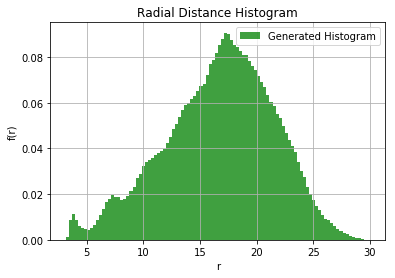

In [4]:
plt.title('Radial Distance Histogram')
n3, bins3, patches3 = plt.hist(distances, 100, density=True, facecolor='g', alpha=0.75, label='Generated Histogram')
plt.grid(True)
plt.legend()
plt.xlabel('r')
plt.ylabel('f(r)')
plt.show()

In [5]:
dr = radii[1]

rdf = histogram_distances
rdf = rdf/rho
for i, r in enumerate(radii[1:]):
    dr = radii[i+1] - radii[i]
    rdf[i] = rdf[i]/(4 * np.pi * r**2 * dr)

In [41]:
max_num = 10
local_max = []
max_rdf_idxs = np.argsort(rdf)[-max_num:]
for idx in max_rdf_idxs:
    if rdf[idx - 1] < rdf[idx] and rdf[idx] > rdf[idx + 1]: local_max.append(idx)
local_max

[50, 34, 18]

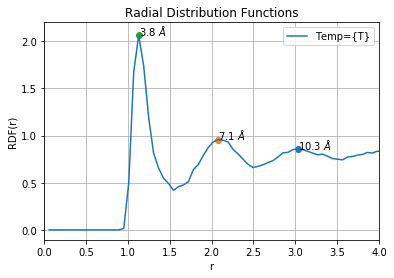

In [58]:
plt.title('Radial Distribution Functions')
plt.plot(radii[1:]/sigma, rdf, label='Temp={T}')
for i in local_max:
    x=radii[1:][i]/sigma
    y=rdf[i]
    plt.scatter(x, y)
    plt.annotate(r'{x} $\AA$'.format(x=round(x*3.4,1)), (x, y))
plt.grid(True)
plt.legend()
plt.xlabel('r')
plt.ylabel('RDF(r)')
plt.xlim(0,4)
plt.show()

In [ ]:
file_temps = 'temps.dat'
temp_series =  np.genfromtxt(file_temps, delimiter=" ", usecols=range(0,1), unpack=False)

In [ ]:
plt.plot(np.arange(nsteps)[5100:5400], temp_series[5100:5400])
plt.ylim(90,100)
plt.show()